In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from natsort import natsorted

In [3]:
def generate_function(a=1,b=1, c=1, d=0):
    def function(x):
        return a * x ** 3 + b * x ** 2 + c * x + d
    return function

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='tanh'),
    tf.keras.layers.Dense(1)
])
checkpoint = ModelCheckpoint(filepath='weights_{epoch:02d}.hdf5', period=10)

In [5]:
#generate the function
function = generate_function(0, 1, 1, 1)

#generate training data
x = np.random.uniform(-1, 1, size=(1000,1))
y = function(x)
#normalize
y = (y-y.min()) / (y.max()-y.min())

In [16]:
#train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
history = model.fit(
    x,
    y,
    batch_size=32,
    epochs=500,
    validation_split=0.2,
    verbose=0,
    callbacks=[checkpoint]
)

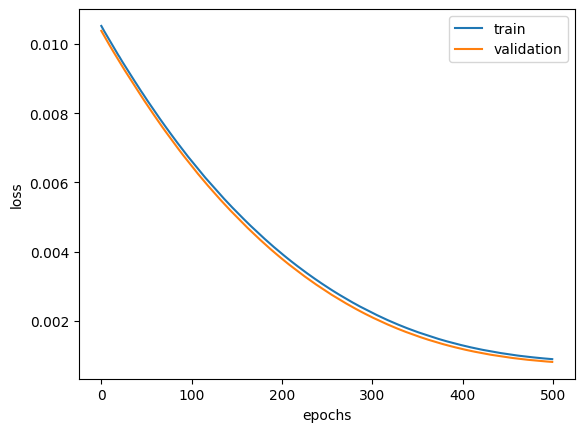

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
for i , weights_file in enumerate(natsorted(glob.glob('./*hdf5'))):
    model.load_weights(weights_file)

    x_values = np.linspace(-1, 1, 100)

    y_values = model.predict(x_values)

    plt.plot(x_values, y_values, label='predicted', color='green')

    y_true = function(x_values)
    y_true = (y_true - y_true.min()) / (y_true.max() - y_true.min())
    plt.plot(x_values, y_true, label='true curve', color='red')
    plt.legend()
    plt.savefig(f'learning_function_{i}.png')
    plt.close()

#create gif for this visualization instead of plotting all the images
import imageio
import os
images = []
for filename in natsorted(glob.glob('./learning_function_*.png')):
    images.append(imageio.imread(filename))
    os.remove(filename)

imageio.mimsave('learning_funcion.gif', images)

4/4 [==============================] - 0s 5ms/step


C:\Users\BRUH\AppData\Local\Temp\ipykernel_10964\3110047169.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


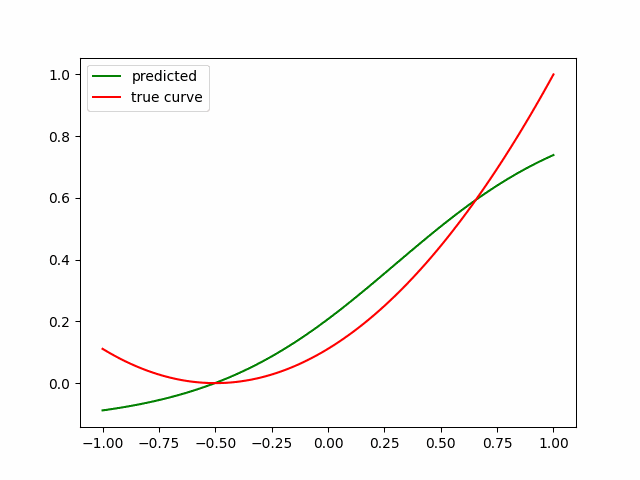

In [24]:
from IPython.display import Image
Image('learning_funcion.gif')
